In [1]:
import scanpy as sc
import squidpy as sq

import numpy as np
import pandas as pd

In [2]:
adata = sc.read_h5ad('datasets/cosmx_melanoma/Melanoma_5612.h5ad')
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.pca(adata)

import os
from pathlib import Path
directory = Path('Benchmarking_results/cosmx')
glb = directory.rglob('*.npy')
files = [str(file) for file in glb if file.is_file()]
file_list = sorted(files)


for filename in file_list:
    name = filename[27:-4]
    adata.obsm[name] = np.load(filename)
    
for i in range(5):
    adata.obsm['GraphST'+str(i)] = sc.pp.pca(adata.obsm['GraphST'+str(i)])


from simvi.model import SimVI
edge_index = SimVI.extract_edge_index(adata,batch_key='CPID_str',n_neighbors=10)
import numpy as np
from scipy.sparse import coo_matrix, csr_matrix
coo = coo_matrix((np.ones(edge_index[0].shape[0]), (edge_index[0].numpy(), edge_index[1].numpy())), shape=(adata.shape[0],adata.shape[0]))
for i in range(5):
    adata.obsm['scviavg'+str(i)] = 0.1 * coo.toarray() @ adata.obsm['scvi'+str(i)]
    adata.obsm['cellcharter'+str(i)] = np.hstack((adata.obsm['scvi'+str(i)],adata.obsm['scviavg'+str(i)]))

Global seed set to 0


In [3]:
s_list = [file[27:-4] for file in file_list]
s_list.extend(['cellcharter'+str(i) for i in range(5)])

s_list.append('X_pca')
s_list

['GraphST0',
 'GraphST1',
 'GraphST2',
 'GraphST3',
 'GraphST4',
 'STAGATE0',
 'STAGATE1',
 'STAGATE2',
 'STAGATE3',
 'STAGATE4',
 'harmony0',
 'harmony1',
 'harmony2',
 'harmony3',
 'harmony4',
 'scvi0',
 'scvi1',
 'scvi2',
 'scvi3',
 'scvi4',
 'simvi_0',
 'simvi_1',
 'simvi_2',
 'simvi_3',
 'simvi_4',
 'simvi_lz0',
 'simvi_lz1',
 'simvi_lz2',
 'simvi_lz3',
 'simvi_lz4',
 'simvi_s0',
 'simvi_s1',
 'simvi_s2',
 'simvi_s3',
 'simvi_s4',
 'simvi_z0',
 'simvi_z1',
 'simvi_z2',
 'simvi_z3',
 'simvi_z4',
 'simvigo_s0',
 'simvigo_s1',
 'simvigo_s2',
 'simvigo_s3',
 'simvigo_s4',
 'simvigoct_s0',
 'simvigoct_s1',
 'simvigoct_s2',
 'simvigoct_s3',
 'simvigoct_s4',
 'cellcharter0',
 'cellcharter1',
 'cellcharter2',
 'cellcharter3',
 'cellcharter4',
 'X_pca']

In [4]:
from scib_metrics.benchmark import Benchmarker, BioConservation, BatchCorrection
biocons = BioConservation(isolated_labels=False,nmi_ari_cluster_labels_leiden=True,nmi_ari_cluster_labels_kmeans=False,clisi_knn=False)
#bat = BatchCorrection(silhouette_batch = False, ilisi_knn=False, kbet_per_label = False, graph_connectivity = False, pcr_comparison=False)
bat_ = BatchCorrection(ilisi_knn=False)
bm = Benchmarker(
    adata,
    batch_key="CPID_str",
    label_key="celltype",
    embedding_obsm_keys=s_list,
    pre_integrated_embedding_obsm_key='X_pca',
    bio_conservation_metrics=biocons,
    batch_correction_metrics=bat_,
    n_jobs=20,
)
bm.benchmark()

bm._results.to_csv('Benchmarking_results/cosmx_ct.csv')

/usr/local/lib/python3.8/dist-packages/scib_metrics/benchmark/_core.py:178: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  self._emb_adatas[emb_key] = AnnData(self._adata.obsm[emb_key], obs=self._adata.obs)
/usr/local/lib/python3.8/dist-packages/scib_metrics/benchmark/_core.py:178: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  self._emb_adatas[emb_key] = AnnData(self._adata.obsm[emb_key], obs=self._adata.obs)
/usr/local/lib/python3.8/dist-packages/scib_metrics/benchmark/_core.py:178: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9

Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [03:13<02:25, 29.12s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  50%|██████

Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [01:06<00:59, 11.99s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  50%|██████

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [01:24<01:08, 13.68s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(

Metrics:   0%|      

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [02:59<02:16, 27.23s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(

Metrics:   0%|      

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [02:57<02:13, 26.64s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(

Metrics:   0%|      

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [01:09<01:01, 12.39s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(

Metrics:   0%|      

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [01:10<01:03, 12.66s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(

Metrics:   0%|      

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [01:16<01:07, 13.42s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(

Metrics:   0%|      

Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [01:15<01:07, 13.57s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  50%|██████

Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [01:12<01:05, 13.14s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  50%|██████

Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [01:14<01:08, 13.63s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  50%|██████

Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [02:55<02:09, 25.86s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  50%|██████

In [59]:
from scib_metrics.benchmark import Benchmarker, BioConservation, BatchCorrection

adata_immune = adata[adata.obs['celltype'].str.contains('CD8')].copy()

biocons = BioConservation(isolated_labels=False,nmi_ari_cluster_labels_leiden=True,nmi_ari_cluster_labels_kmeans=False,clisi_knn=False)
#bat = BatchCorrection(silhouette_batch = False, ilisi_knn=False, kbet_per_label = False, graph_connectivity = False, pcr_comparison=False)
bat_ = BatchCorrection(ilisi_knn=False)
bm2 = Benchmarker(
    adata_immune,
    batch_key="CPID_str",
    label_key="BEST_RESPONSE_BY_SCAN",
    embedding_obsm_keys=s_list,
    pre_integrated_embedding_obsm_key='X_pca',
    bio_conservation_metrics=biocons,
    batch_correction_metrics=bat_,
    n_jobs=20,
)
bm2.benchmark()

bm2._results.to_csv('Benchmarking_results/cosmx_response.csv')

/usr/local/lib/python3.8/dist-packages/scib_metrics/benchmark/_core.py:178: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  self._emb_adatas[emb_key] = AnnData(self._adata.obsm[emb_key], obs=self._adata.obs)
/usr/local/lib/python3.8/dist-packages/scib_metrics/benchmark/_core.py:178: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  self._emb_adatas[emb_key] = AnnData(self._adata.obsm[emb_key], obs=self._adata.obs)
/usr/local/lib/python3.8/dist-packages/scib_metrics/benchmark/_core.py:178: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9

Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:04,  1.22it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  50%|███████

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:02,  1.82it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|       

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:02,  1.69it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|       

Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:05,  1.08s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  50%|██████

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

                                                                                                                                                                                                                                                               
Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:02,  1.79it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                     

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:02,  1.78it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|       

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.42it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|       

Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:04,  1.21it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  50%|███████

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


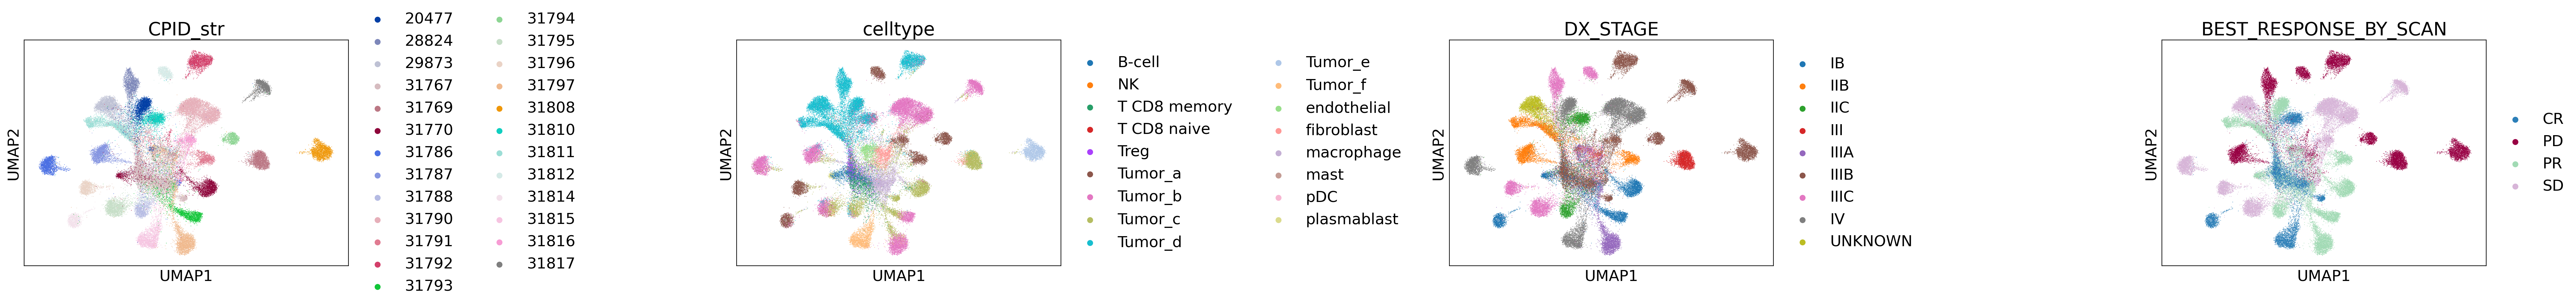

In [240]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
plt.rcParams["font.size"] = 18
sc.pp.neighbors(adata,use_rep='X_pca')
sc.tl.umap(adata)

adata.uns['BEST_RESPONSE_BY_SCAN_colors'] = ['#2c7fb8','#980043','#a1dab4','#d7b5d8']
sc.pl.umap(adata,color=['CPID_str','celltype','DX_STAGE','BEST_RESPONSE_BY_SCAN'],wspace=1)